# Lets make an Data analysis about this Ecommerce Website

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
df = pd.read_csv("Ecommerce Customers")

In [117]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [119]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [120]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

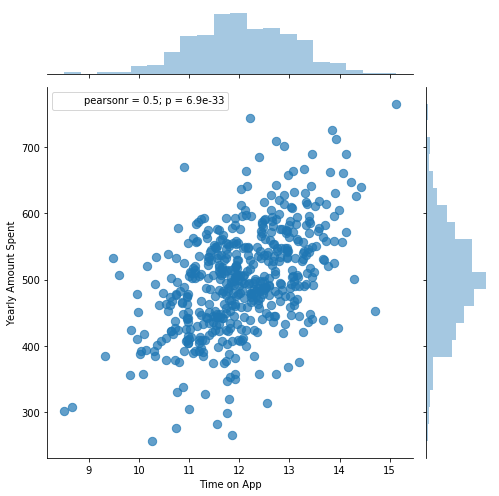

In [121]:
sns.jointplot(df["Time on App"], df["Yearly Amount Spent"], size=7, s=70, alpha=0.7)

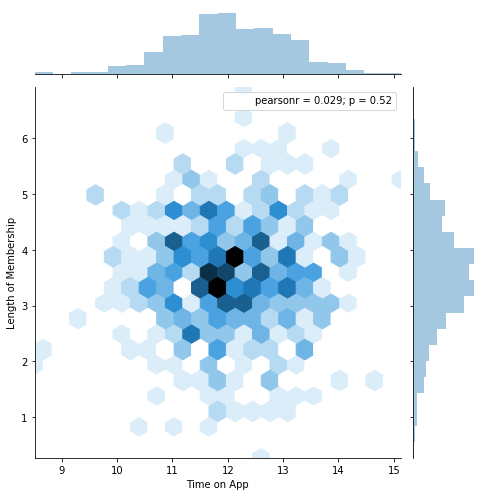

In [122]:
sns.jointplot(df["Time on App"], df["Length of Membership"], size=7, kind="hex")

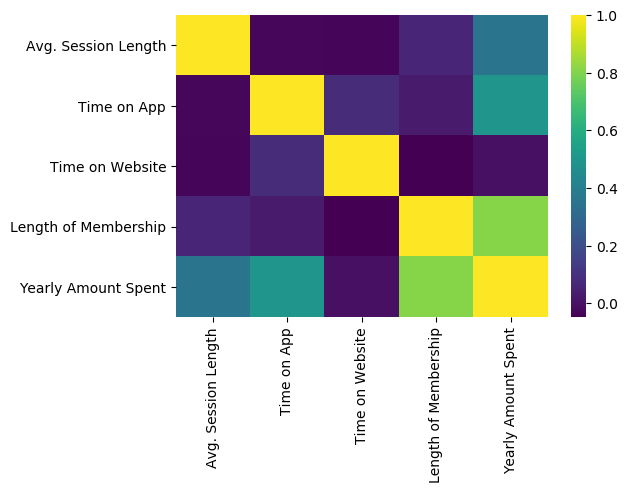

In [123]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), cmap="viridis")

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

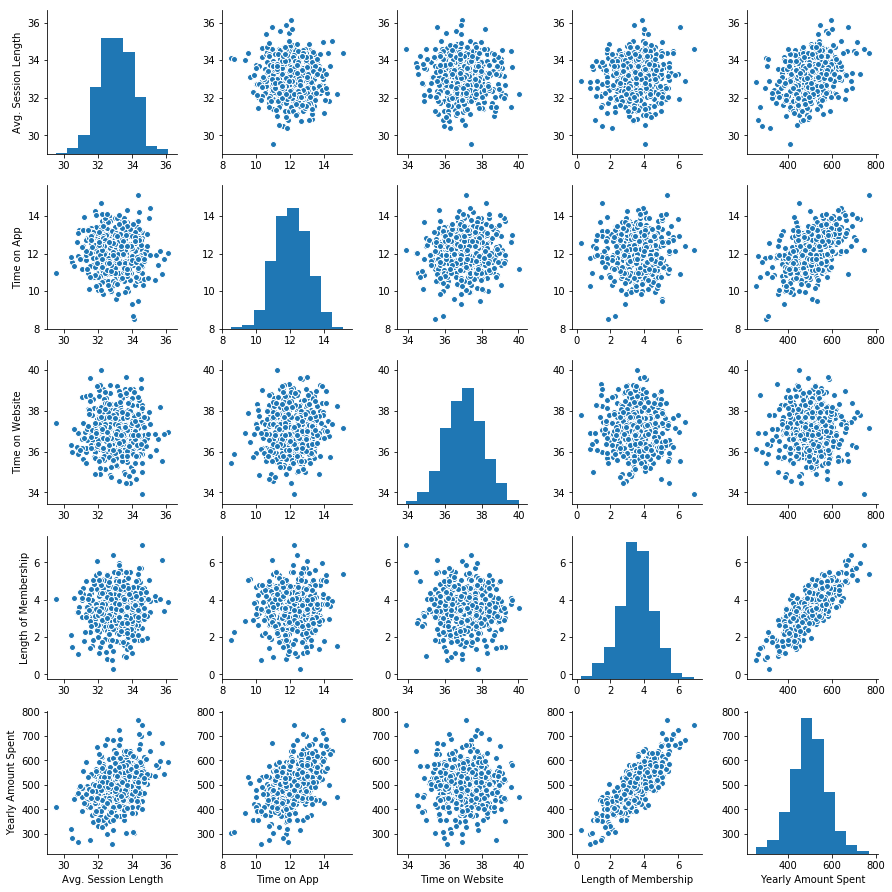

In [124]:
sns.pairplot(df)

## There is a correlation between Yearly Amount Spent and Length of Membership

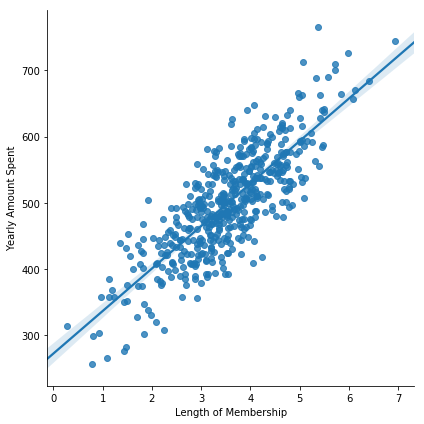

In [125]:
# Take a look at this correlation
sns.lmplot("Length of Membership", "Yearly Amount Spent", df, size=6)

In [126]:
df.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [127]:
# Set the X and y variables
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

y = df["Yearly Amount Spent"]

In [128]:
# Lets split the data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [129]:
# Lets train the model
from sklearn.linear_model import LinearRegression

# Instantiate
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
# Take a look at how our model perform
print("Intercept_:", lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=["Coeff"])

coeff_df.index.name = "Numerical Features"

coeff_df

Intercept_: -1048.54292234


,Coeff
Numerical Features,
Avg. Session Length,25.697836
Time on App,38.811856
Time on Website,0.411511
Length of Membership,60.945080


In [131]:
predictions = lm.predict(X_test)

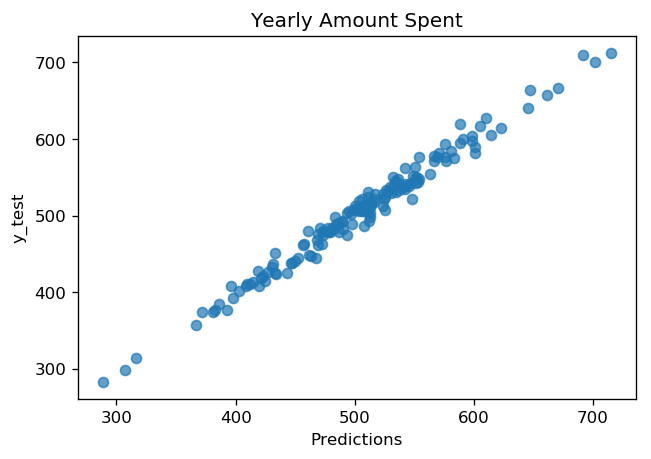

In [132]:
# Lets plot our predictions vs the y_test value of Yearly Amount Spent 
plt.figure(dpi=120)
plt.scatter(predictions, y_test, alpha=0.7)
plt.title("Yearly Amount Spent")
plt.xlabel("Predictions")
plt.ylabel("y_test")
plt.show()

In [133]:
# Evaluate the model
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 7.93182494812
MSE: 100.734605381
RMSE: 10.0366630601


In [139]:
# Calculate the r^2 (How much variance the model explain)
metrics.explained_variance_score(y_test, predictions)

0.98219793513367237

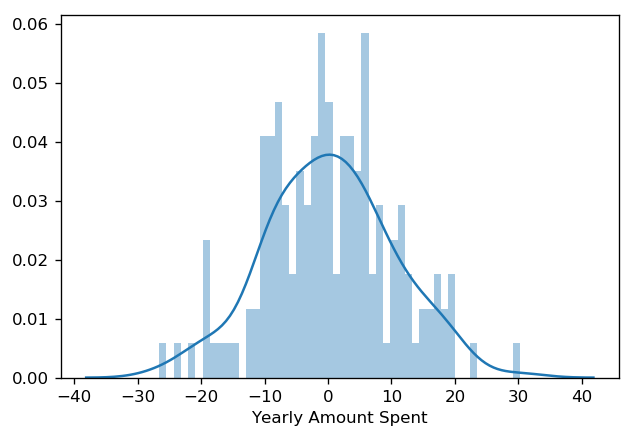

In [140]:
# Lets plot the residuals in an histogram to see the distribution
plt.figure(dpi=120)
sns.distplot((y_test-predictions), bins=50)
plt.show()

In [141]:
coeff_df

,Coeff
Numerical Features,
Avg. Session Length,25.697836
Time on App,38.811856
Time on Website,0.411511
Length of Membership,60.945080


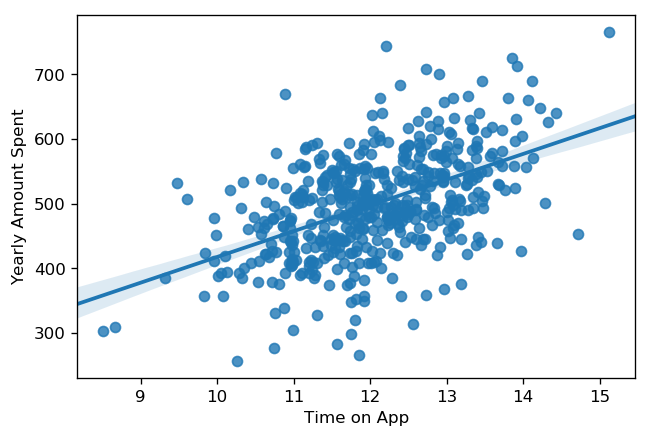

In [142]:
plt.figure(dpi=120)

sns.regplot(df["Time on App"], df["Yearly Amount Spent"])

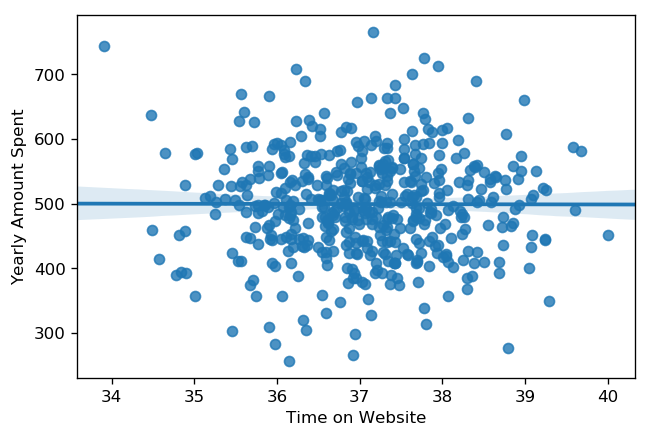

In [143]:
plt.figure(dpi=120)

sns.regplot(df["Time on Website"], df["Yearly Amount Spent"])

# Conclusion

At the end of the day, between to invest on their website or on their App, they should choose the App because there is a direct correlation between time spend on it ant the Yearly Amount Spent. By investing in the app, they would get people spend more time on their app so more Yearly Amount Spent on average.